In [1]:
# Install necessary libraries (only if needed)
import pandas as pd
import ast
import matplotlib.pyplot as plt
from datasets import load_dataset

# Load dataset
dataset = load_dataset('lukebarousse/data_jobs')

# Convert dataset to Pandas DataFrame
df = dataset['train'].to_pandas()

# Check if 'job_posted_date' exists
if 'job_posted_date' in df.columns:
    df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

# Ensure 'job_skills' exists and convert it properly
if 'job_skills' in df.columns:
    df['job_skills'] = df['job_skills'].apply(
        lambda x: ast.literal_eval(x) if isinstance(x, str) and pd.notna(x) else x
    )
# Filter for Data Analyst data
    df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

In [4]:
# Only get Data Analyst jobs in the United States
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NaN values from the 'salary_year_avg' column for plotting
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

# Sample 10 random values from the 'salary_year_avg' column
df_DA_US['salary_year_avg'].sample(10)

536124    117500.000000
538200     50325.000000
385979    142045.000000
773154     80000.000000
562869     87500.000000
537284     95000.000000
43123      51014.000000
7350      150000.000000
496803     60000.000000
546671     64395.203125
Name: salary_year_avg, dtype: float64

C:\Users\Dell\AppData\Local\Temp\ipykernel_18176\252970558.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


NameError: name 'mticker' is not defined

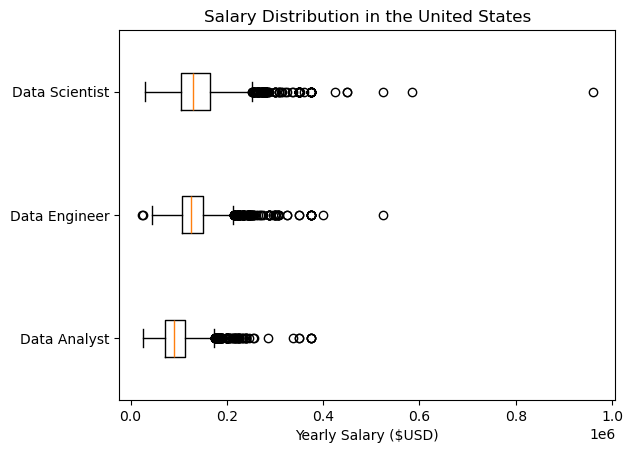

In [14]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

# Filter the data to the appropriate job titles
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()
df_US = df_US.dropna(subset=['salary_year_avg'])

job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']  # Example definition
# Assume df_US is defined, e.g., from previous filtering

job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
ax = plt.gca()
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f'${int(x):,}'))  # Format as $ with commas
plt.xlim(0, 300000)  # Adjusted range for typical salaries
plt.show()
